In [1]:
import csv
from datetime import date, timedelta, datetime
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

#### Read the file
Skipping irrelevant data: death date not within the expected year and pages created after the beginning of the year (to filter out the bias of posthumous pages creation)

In [2]:
def read_file(year):
    d = []
    filename = "deaths{}.csv".format(year)
    with open(filename, 'r') as f:
        r = csv.reader(f)
        for row in r:
            if row[0]=='Name': continue
            name = row[0]
            birth = date.fromisoformat(row[1])
            death = date.fromisoformat(row[2])
            covid = (row[3] == 'True')
            created = date.fromisoformat(row[4])
            if death < date(year,1,1) or death >=date(year+1,1,1):
                print ("Page {} weird death date {}".format(name, death))
                continue
            if created >= date(year,1,1):
                #print ("Page {} created too late: {}".format(name, death))
                continue
            d.append([name,birth,death,covid,created])
    return d

In [3]:
d2020 = read_file(2020)

Page Iryna Bekeshkina weird death date 2010-03-20
Page Glenn Steil Sr. weird death date 2010-05-07
Page Mian Muhammad Afzal Hayat weird death date 1997-02-20
Page Murad Wilfried Hofmann weird death date 2019-12-20
Page Stanislav Libenský and Jaroslava Brychtová weird death date 2002-02-24
Page Del Martin and Phyllis Lyon weird death date 2008-08-27
Page Étienne Périer (director) weird death date 2010-06-21
Page Kiing Shooter weird death date 2019-12-20
Page Jim Janssen van Raaij weird death date 2010-02-11


In [4]:
def hist_death(data, start_day, end_day=None, filt=None):
    if not filt: filt = lambda _: True
    if not end_day: end_day = date(start_day.year+1,1,1)
    num_days = (end_day-start_day).days
    dates = [start_day+timedelta(days=j) for j in range(num_days)]
    count = np.zeros(num_days)
    for row in data:
        if not filt(row):
            continue
        j=(row[2]-start_day).days
        if j<0 or j>=num_days:
            continue
        count[j]+=1
    return dates, count

In [5]:
end_day = date(2020,12,31)  # Skip Dec 31 to make a 365 day year
start_day = date(2020,1,1)
dates2020, count_all = hist_death(d2020, start_day, end_day)
_, count_cvd = hist_death(d2020, start_day, end_day, lambda row: row[3])
_, count_base = hist_death(d2020, start_day, end_day, lambda row: not row[3])

In [6]:
def ma(x, win=7):
    w = np.ones(win)/win
    return np.convolve(x, w, 'valid')
ma_all = ma(count_all)
ma_cvd = ma(count_cvd)
ma_base = ma(count_base)

In [7]:
d2019 = read_file(2019)

Page Bettina F. Bradbury weird death date 2006-01-20
Page Dave Maynard weird death date 2012-02-12
Page Susan Irvine weird death date 2013-08-05
Page Lev Kolodub weird death date 1977-03-30
Page Sushil Kumar (admiral) weird death date 2001-12-29
Page Anilkumar Patel weird death date 2018-02-08
Page Ehsan-ul-Haq Piracha weird death date 1990-12-06
Page Augie and Margo Rodriguez weird death date 2014-07-18
Page Marv Terhoch weird death date 1981-05-31
Page Ed and Lorraine Warren weird death date 2006-08-23
Page Allen S. Whiting weird death date 2018-01-11
Page Bill K. Williams weird death date 2005-01-18


In [8]:
dates2019, count2019 = hist_death(d2019, date(2019,1,1))
ma2019 = ma(count2019)

#### Plotting daily mortality
`All` - all deaths; `COVID` - deaths with COVID or coronavirus mentioned; `Base` - non-COVID deaths; 2019 - corresponding data from 2019 for comparison.
The solid lines are 7 day moving average.

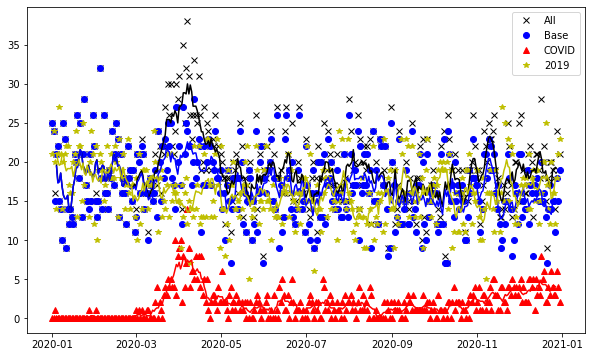

In [9]:
plt.figure(figsize=(10,6))
plt.plot_date(dates2020, count_all, 'kx')
plt.plot_date(dates2020, count_base, 'bo')
plt.plot_date(dates2020, count_cvd, 'r^')
plt.plot_date(dates2020, count2019, 'y*')
plt.plot_date(dates2020[3:-3], ma_all, 'k-')
plt.plot_date(dates2020[3:-3], ma_base, 'b-')
plt.plot_date(dates2020[3:-3], ma_cvd, 'r-')
plt.plot_date(dates2020[3:-3], ma2019, 'y-')
plt.legend(['All', 'Base', 'COVID', '2019'])

In [10]:
np.sum(count_all)

6881.0

In [11]:
np.sum(count_cvd)/np.sum(count_all)

0.09911350094463015

In [12]:
ages = [(row[2] - row[1])/timedelta(days=365.25) for row in d2020]
ages_cvd = [(row[2] - row[1])/timedelta(days=365.25) for row in d2020 if row[3]]
ages2019 =  [(row[2] - row[1])/timedelta(days=365.25) for row in d2019]

#### Age at death histogram
Blue = all deaths; orange = COVID deaths

(array([0.        , 0.        , 0.00029283, 0.        , 0.        ,
        0.00058565, 0.00029283, 0.00058565, 0.00322108, 0.00234261,
        0.00439239, 0.01288433, 0.01493411, 0.01581259, 0.02781845,
        0.02928258, 0.03103953, 0.02869693, 0.01961933, 0.00585652,
        0.00204978, 0.00029283]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105.,
        110.]),
 [<matplotlib.patches.Polygon at 0x7f620fd9d6d0>])

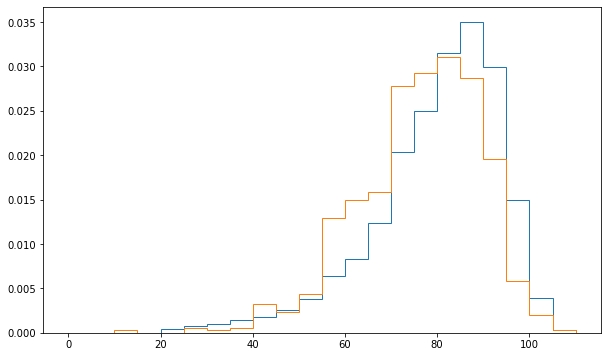

In [51]:
plt.figure(figsize=(10,6))
plt.hist(ages, bins=22, histtype='step', density=True, range=(0,110))
plt.hist(ages_cvd, bins=22, histtype='step', density=True, range=(0,110))

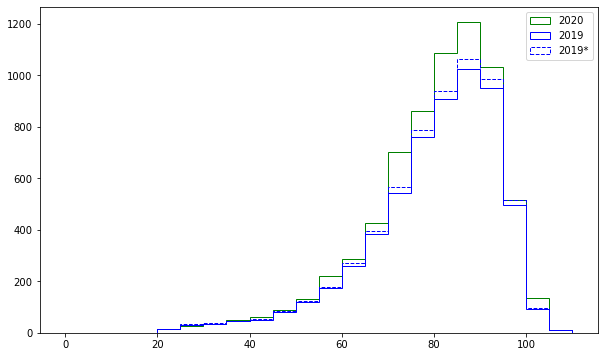

In [70]:
plt.figure(figsize=(10,6))
h=plt.hist(ages, bins=22, histtype='step', color='g', range=(0,110))
ho=plt.hist(ages2019, bins=22, histtype='step', color='b', range=(0,110))
plt.hist(ages2019, weights=np.ones(len(ages2019))*1.037, bins=22, histtype='step', color='b', ls='--', range=(0,110))
plt.legend(['2020', '2019', '2019*'])

[0.000e+00 0.000e+00 1.000e+00 0.000e+00 1.400e+01 2.600e+01 3.500e+01
 5.000e+01 6.200e+01 8.900e+01 1.300e+02 2.200e+02 2.870e+02 4.280e+02
 7.010e+02 8.630e+02 1.085e+03 1.206e+03 1.031e+03 5.170e+02 1.370e+02
 1.200e+01] [0.000e+00 0.000e+00 0.000e+00 1.000e+00 1.500e+01 3.200e+01 3.600e+01
 4.500e+01 5.000e+01 8.000e+01 1.200e+02 1.720e+02 2.610e+02 3.820e+02
 5.440e+02 7.610e+02 9.070e+02 1.024e+03 9.500e+02 4.970e+02 9.100e+01
 1.100e+01]


<BarContainer object of 22 artists>

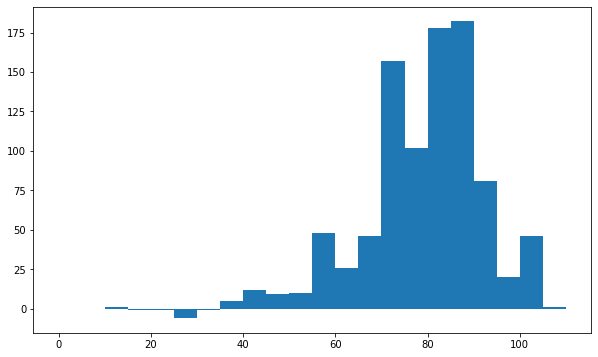

In [73]:
print(h[0],ho[0])
plt.figure(figsize=(10,6))
plt.bar(np.arange(0,110,5),h[0]-ho[0], width=5, align='edge')

In [15]:
np.median(ages), np.median(ages_cvd), np.average(ages), np.average(ages_cvd)

(82.6611909650924, 77.93018480492813, 79.95733836827866, 76.32838576036991)

### Cumulative anomaly comparing to the 2017-2019 average since start of the year

In [16]:
d2018 = read_file(2018)
dates2018, count2018 = hist_death(d2018, date(2018,1,1))
d2017 = read_file(2017)
dates2017, count2017 = hist_death(d2017, date(2017,1,1))

Page Dugan Aguilar weird death date 2008-01-27
Page Scotty Bloch weird death date 2013-01-10
Page Peter Boakye-Ansah weird death date 2008-07-19
Page Pearl Carr & Teddy Johnson weird death date 2020-02-16
Page Edoardo Catellani weird death date 2019-07-10
Page John Conboy weird death date 2004-03-15
Page Rodolfo de la Garza weird death date 2019-08-05
Page Christa Dichgans weird death date 1997-02-26
Page Marianne Eigenheer weird death date 2012-02-11
Page Caroline Hebbe weird death date 1959-01-18
Page Billy Ray Irick weird death date 1985-04-16
Page Hans Joachim Keil III weird death date 2019-08-31
Page Margo McCaffery weird death date 2008-01-09
Page David Wynn Miller weird death date 2019-06-22
Page Özden Örnek weird death date 2005-08-26
Page Alice and Martin Provensen weird death date 1987-03-27
Page Robert Roripaugh weird death date 2019-01-02
Page Ian Spry weird death date 1994-05-28
Page Caleb Warner weird death date 2017-08-24
Page Theodor Bergmann (agronomist) weird death da

In [17]:
c2020 = np.cumsum(count_all)
c2019 = np.cumsum(count2019)
c2018 = np.cumsum(count2018)
c2017 = np.cumsum(count2017)
print(c2017[-1], c2018[-1], c2019[-1], c2020[-1])

5613.0 5780.0 5984.0 6881.0


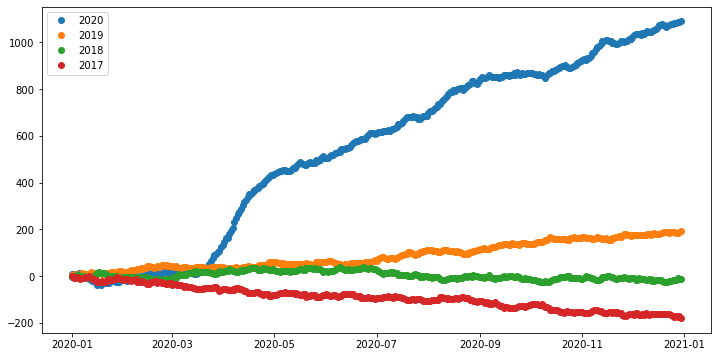

In [18]:
plt.figure(figsize=(12,6))
cavg = (c2019+c2018+c2017)/3.0
plt.plot_date(dates2020, c2020-cavg)
plt.plot_date(dates2020, c2019-cavg)
plt.plot_date(dates2020, c2018-cavg)
plt.plot_date(dates2020, c2017-cavg)
plt.legend(['2020', '2019', '2018', '2017'])

#### Same but trying to control against the corpus size

In [19]:
wp_size = np.array([5321200, 5541900, 5773600, 5989400])
weight = wp_size[-1]/wp_size
print(weight)
cs2017, cs2018, cs2019, cs2020 = c2017*weight[0], c2018*weight[1], c2019*weight[2], c2020*weight[3]

[1.12557318 1.08074848 1.03737703 1.        ]


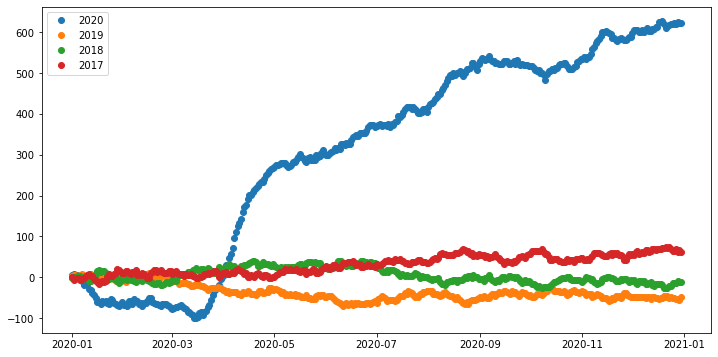

In [20]:
plt.figure(figsize=(12,6))
csavg = (cs2019+cs2018+cs2017)/3.0
plt.plot_date(dates2020, cs2020-csavg)
plt.plot_date(dates2020, cs2019-csavg)
plt.plot_date(dates2020, cs2018-csavg)
plt.plot_date(dates2020, cs2017-csavg)
plt.legend(['2020', '2019', '2018', '2017'])

Doesn't look very good, probably the corpus growth for people is slower. Ok, let's assume there was a linear corpus growth (at scale of 10% linear doesn't significantly differ from exponential).

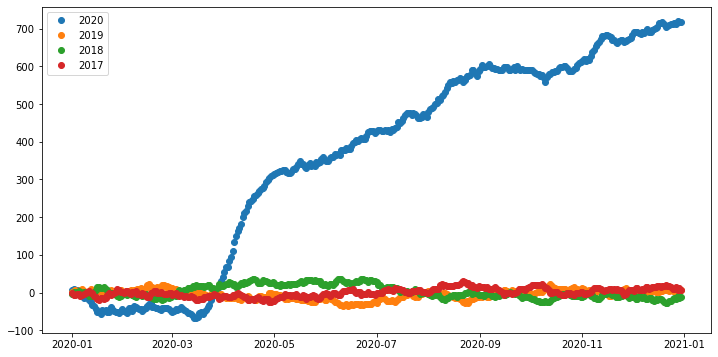

In [21]:
f1,f0 = np.polyfit([2017,2018,2019], [c2017[-1],c2018[-1],c2019[-1]], deg=1)
eoy = f0+f1*np.array([2017,2018,2019,2020])
yearly = (c2019+c2018+c2017)/3.0 - eoy[1]*np.arange(365)/365
plt.figure(figsize=(12,6))
plt.plot_date(dates2020, c2020-eoy[3]*np.arange(len(c2020))/365-yearly[:len(c2020)])
plt.plot_date(dates2020, c2019-eoy[2]*np.arange(365)/365-yearly)
plt.plot_date(dates2020, c2018-eoy[1]*np.arange(365)/365-yearly)
plt.plot_date(dates2020, c2017-eoy[0]*np.arange(365)/365-yearly)
plt.legend(['2020','2019','2018','2017'])

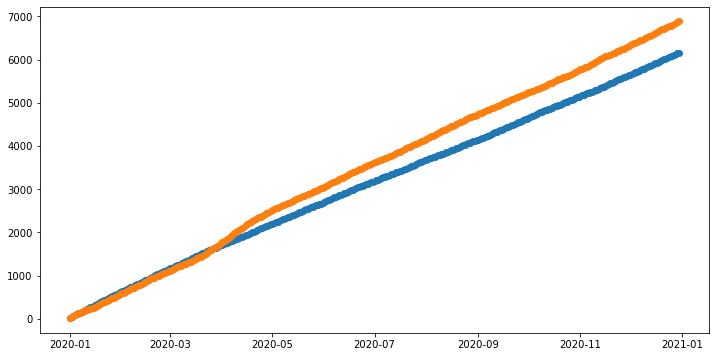

In [22]:
expected = (c2019+c2018+c2017)/3.0 + 2*f1*np.arange(365)/365
plt.figure(figsize=(12,6))
plt.plot_date(dates2020,expected)
plt.plot_date(dates2020, c2020)

In [23]:
print(c2020[-1]/expected[-1])

1.1166254701391032


<BarContainer object of 52 artists>

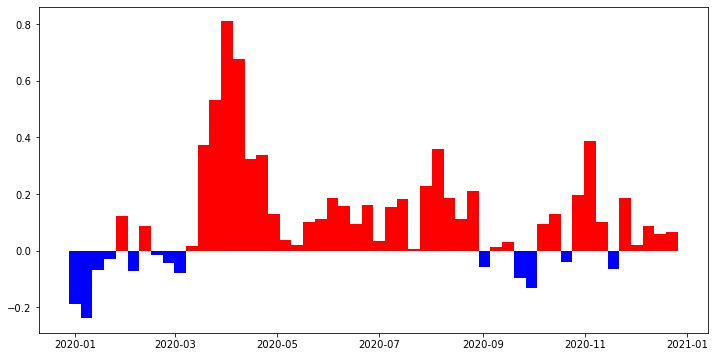

In [49]:
weeks = [dates2020[7*k] for k in range(52)]
c_wk = np.array([c2020[7*(k+1)]-c2020[7*k] for k in range(52)])
e_wk = np.array([expected[7*(k+1)]-expected[7*k] for k in range(52)])
plt.figure(figsize=(12,6))
plt.bar(weeks, (c_wk-e_wk)/(expected[-1]/52), width=7, color=np.where(c_wk>e_wk, 'r', 'b'), ls='--')